<a href="https://colab.research.google.com/github/Nikithanatarajan1312/Prediction-using-Decision-Tree-Algorithm/blob/main/GRIP_Task6_Prediction_using_Decision_Tree_Algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Name : N. NIKITHA
### Domain : DATA SCIENCE AND BUSINESS ANALYTICS
### Task 6 : PREDICTION USING DECISION TREE ALGORITHM
### Language : Python
### Dataset Link : https://bit.ly/3kXTdox


---



# TASK-6: PREDICTION USING DECISION TREE ALGORITHM

## GRIP December'21

### By N. NIKITHA

##### For the given ‘Iris’ dataset, create the Decision Tree Classifier and visualize it graphically. The purpose is if we feed any new data to this classifier, it would be able to predict the right class accordingly.

##### DATASET: https://bit.ly/3kXTdox


#### Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set(color_codes=True)
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

#### Loading the Iris dataset

In [3]:
data = pd.read_csv('Iris.csv')

In [4]:
data.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


#### Exploring the dataset

In [5]:
data.shape

(150, 6)

The Iris dataset has 150 rows and 6 columns.

In [6]:
data.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

Iris_data contain total 6 features in which 4 features (SepalLengthCm, SepalWidthCm, PetalLengthCm, PetalwidthCm) are independent features and 1 feature(Species) is dependent or target variable. And Id column is like serial number for each data points.

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


All Independent features has not-null float values and target variable has class labels(Iris-setosa, Iris-versicolor, Iris-virginica)


In [8]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [9]:
data.isnull().any()

Id               False
SepalLengthCm    False
SepalWidthCm     False
PetalLengthCm    False
PetalWidthCm     False
Species          False
dtype: bool

In [10]:
data.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

There are no null values in the dataset.

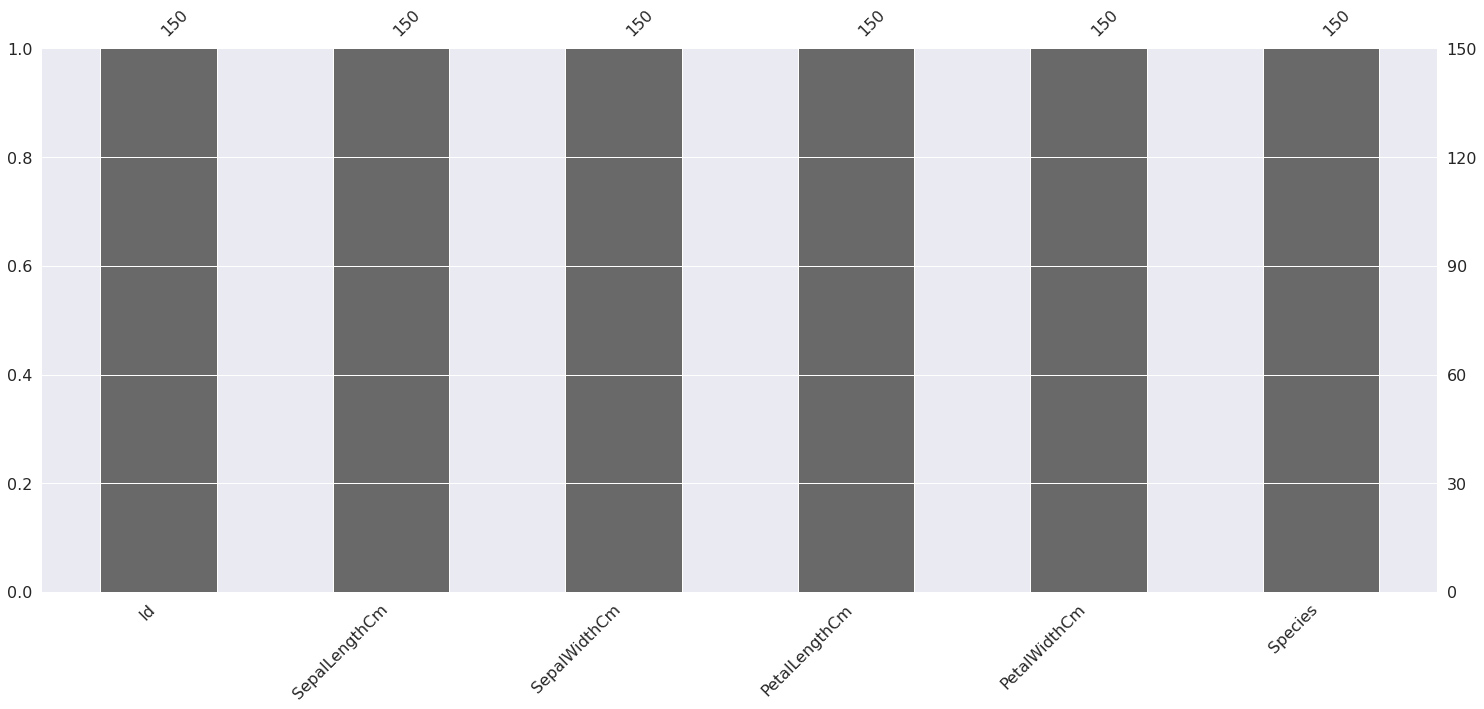

In [11]:
import missingno as msno
msno.bar(data)
plt.show()

In [12]:
data['Species'].value_counts()

Iris-versicolor    50
Iris-setosa        50
Iris-virginica     50
Name: Species, dtype: int64

In [13]:
species_category = pd.crosstab(index=data['Species'], columns= 'count of each species')
species_category

col_0,count of each species
Species,
Iris-setosa,50
Iris-versicolor,50
Iris-virginica,50


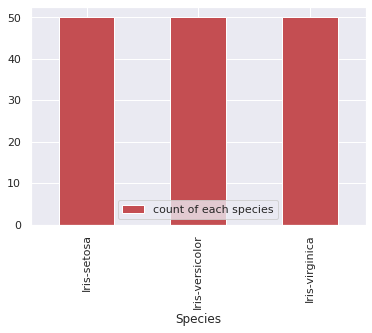

In [14]:
species_category.plot(kind='bar', color='r')
plt.legend()
plt.show()

Each classes (Species) has equal number of data points, So the Iris dataset is a Balanced dataset.

#### Visualizing the target column

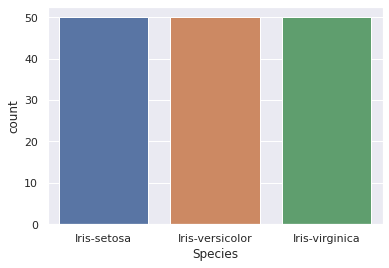

In [15]:
sns.countplot(x='Species', data=data )
plt.show()

#### Relation between variables

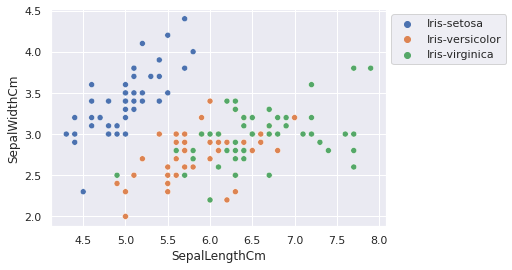

In [16]:
# Sepal Length and Sepal Width

sns.scatterplot(x='SepalLengthCm', y='SepalWidthCm',
                hue='Species', data=data )
  
plt.legend(bbox_to_anchor=(1, 1), loc=2)
  
plt.show()

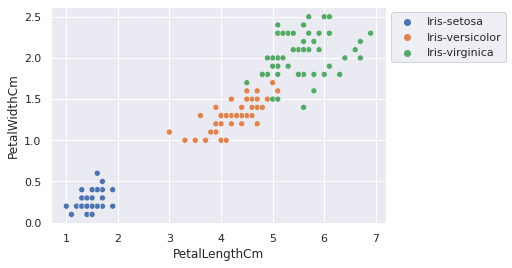

In [17]:
# Petal Length and Petal Width

sns.scatterplot(x='PetalLengthCm', y='PetalWidthCm',
                hue='Species', data=data )
  
plt.legend(bbox_to_anchor=(1, 1), loc=2)
  
plt.show()

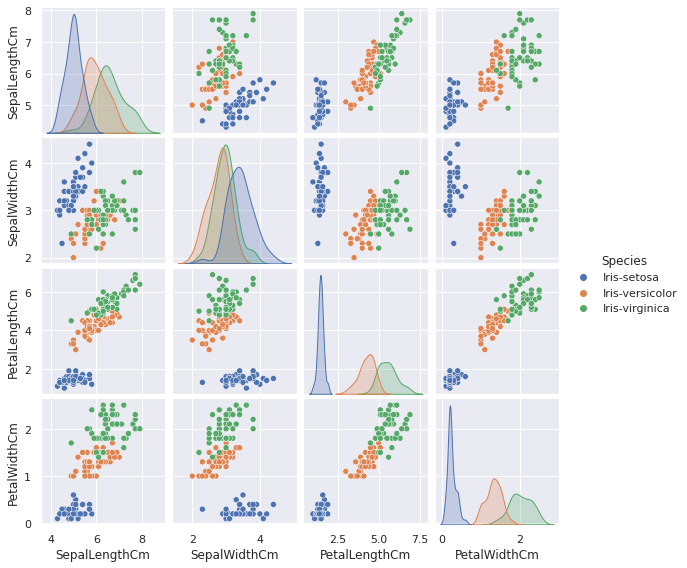

In [18]:
# plotting all the column’s relationships using a pairplot. 

sns.pairplot(data.drop(['Id'], axis = 1), 
             hue='Species', height=2)
plt.show()

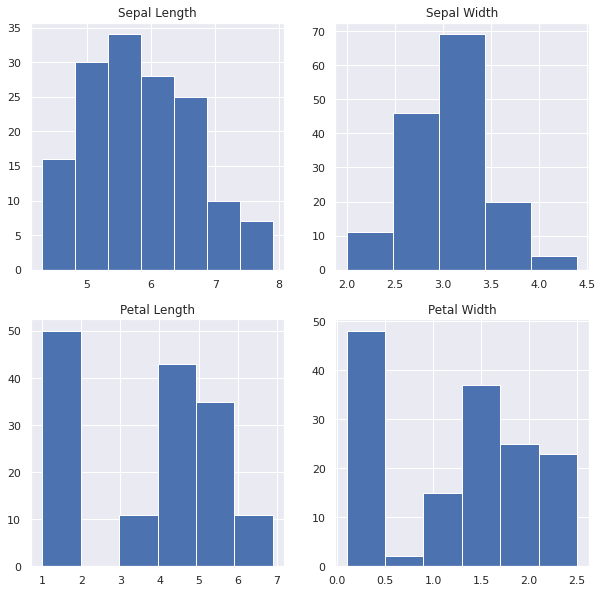

In [19]:
# histogram 

fig, axes = plt.subplots(2, 2, figsize=(10,10))
  
axes[0,0].set_title("Sepal Length")
axes[0,0].hist(data['SepalLengthCm'], bins=7)
  
axes[0,1].set_title("Sepal Width")
axes[0,1].hist(data['SepalWidthCm'], bins=5);
  
axes[1,0].set_title("Petal Length")
axes[1,0].hist(data['PetalLengthCm'], bins=6);
  
axes[1,1].set_title("Petal Width")
axes[1,1].hist(data['PetalWidthCm'], bins=6);

In [20]:
data.corr()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,1.000000,0.716676,-0.397729,0.882747,0.899759
SepalLengthCm,0.716676,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.397729,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.882747,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.899759,0.817954,-0.356544,0.962757,1.000000


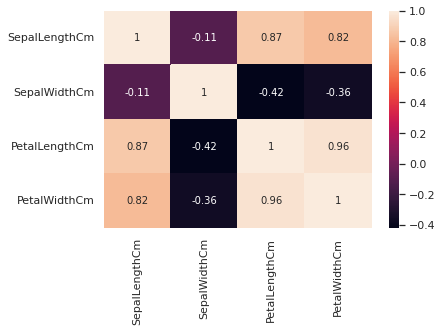

In [21]:
plt.figsize=(10,10)
sns.heatmap(data.corr().drop(['Id'], axis=1).drop(['Id'], axis=0),annot = True);
plt.show()

In [22]:
data['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

#### Encoding the categorical species column

In [23]:
species = {
    'Iris-setosa': 0,
    'Iris-versicolor':1,
    'Iris-virginica':2
}

In [24]:
species

{'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}

In [25]:
data['Species']=data['Species'].map(species)

In [26]:
data['Species'].unique()

array([0, 1, 2])

In [27]:
X = data.iloc[:, 1:5].values
y = data.iloc[:, 5].values

Id column is dropped as it is of no use in classifying the class labels.

In [28]:
X.shape

(150, 4)

In [29]:
y.shape

(150,)

In [30]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

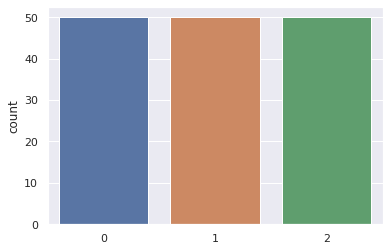

In [31]:
sns.countplot(y)
plt.show()

All the species have equal count in the dataset. Hence, the dataset is balanced.

#### Train-Test splitting

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [33]:
print(X_train.shape)
print(X_test.shape)

(120, 4)
(30, 4)


In [34]:
print(y_train.shape)
print(y_test.shape)

(120,)
(30,)


#### Decision Tree Classifier Model

In [35]:
from sklearn.tree import DecisionTreeClassifier

In [36]:
model = DecisionTreeClassifier()
model.fit(X_train ,y_train)

DecisionTreeClassifier()

In [37]:
y_pred = model.predict(X_test)
y_pred

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

In [38]:
from sklearn import metrics

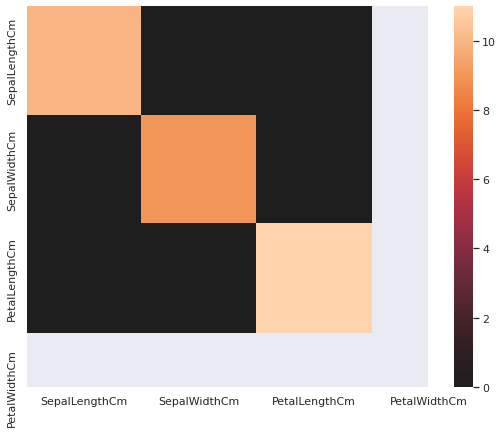

In [39]:
plt.figure(figsize = (9,7))
sns.heatmap(metrics.confusion_matrix(y_test, y_pred), xticklabels = data.iloc[:, 1:5].columns.values,  yticklabels = data.iloc[:, 1:5].columns.values, center = 0)
plt.show()

In [40]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
cm

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]])

In [41]:
accuracy_score(y_test, y_pred) 

1.0

In [42]:
from sklearn.metrics import classification_report
cr = classification_report(y_test, y_pred)
print(cr)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [43]:
print(f"Precision: {metrics.precision_score(y_test, y_pred, average = 'macro')}")
print(f"Recall: {metrics.recall_score(y_test, y_pred, average = 'macro')}")
print(f"F1 Score: {metrics.f1_score(y_test, y_pred, average = 'macro')}")

Precision: 1.0
Recall: 1.0
F1 Score: 1.0


#### Visualizing the Decision Tree

In [44]:
from sklearn import tree

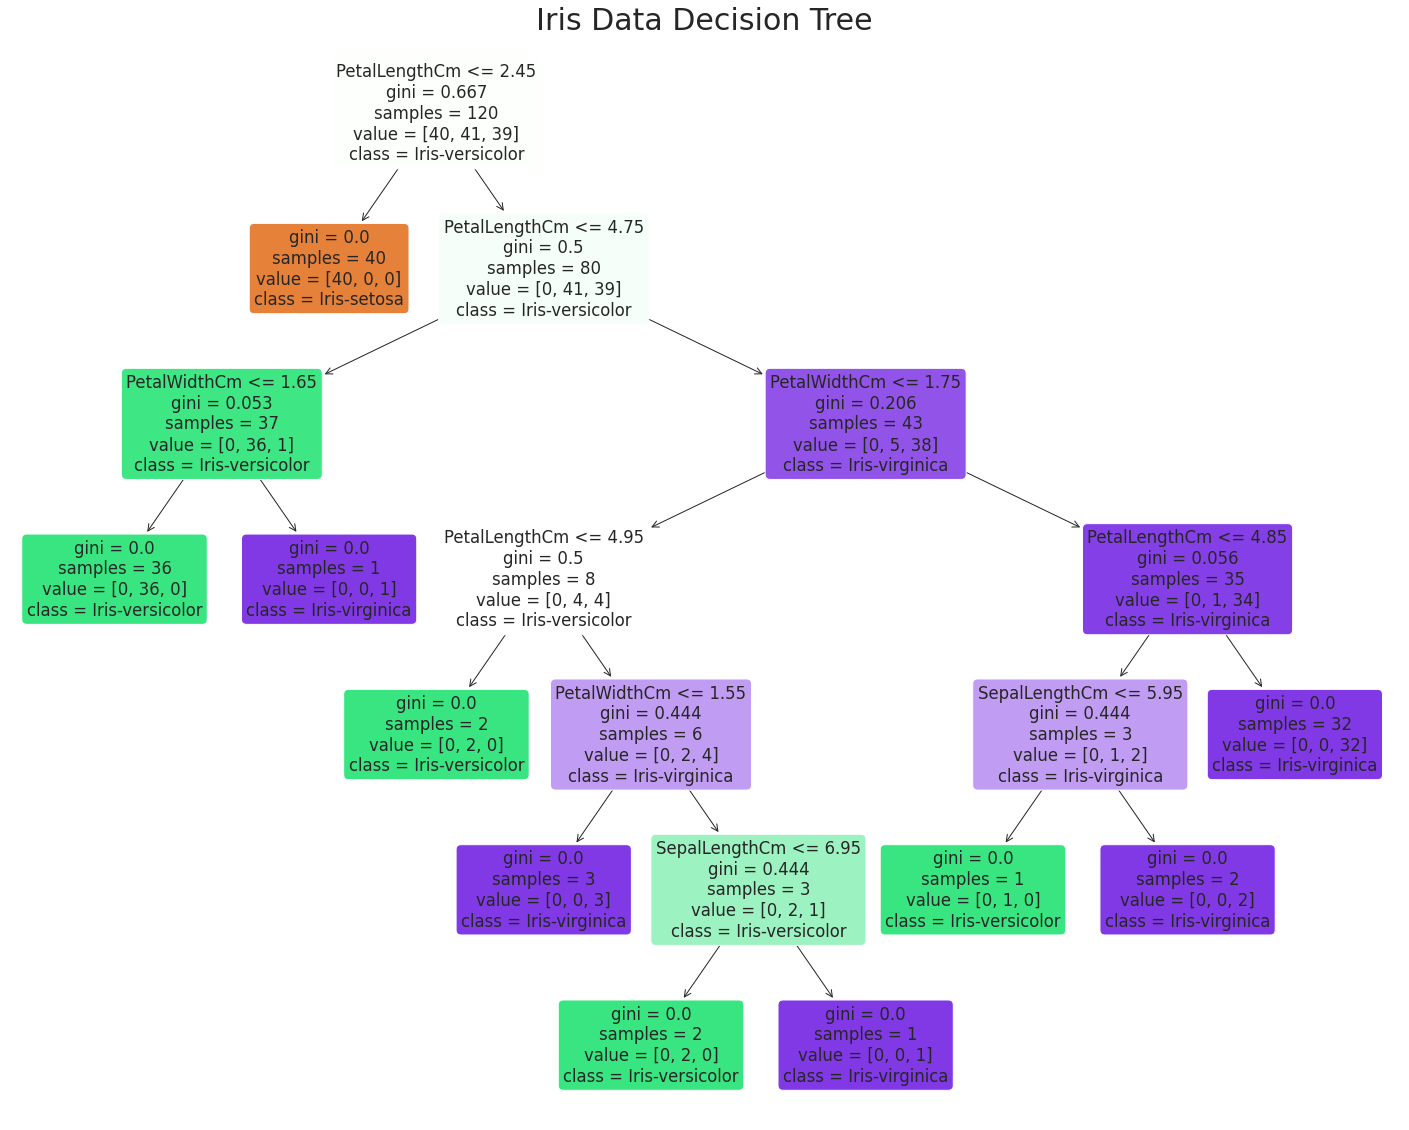

In [45]:
plt.figure(figsize = (25,20))
cn=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

tree.plot_tree(model,
               feature_names = data.iloc[:, 1:5].columns.values,
               filled = True,rounded=True,
               class_names=cn);
plt.title("Iris Data Decision Tree",fontsize=30)
plt.show()

In [46]:
fig.savefig('decision_tree_iris.png')

In [47]:
text_representation = tree.export_text(model)
print(text_representation)

|--- feature_2 <= 2.45
|   |--- class: 0
|--- feature_2 >  2.45
|   |--- feature_2 <= 4.75
|   |   |--- feature_3 <= 1.65
|   |   |   |--- class: 1
|   |   |--- feature_3 >  1.65
|   |   |   |--- class: 2
|   |--- feature_2 >  4.75
|   |   |--- feature_3 <= 1.75
|   |   |   |--- feature_2 <= 4.95
|   |   |   |   |--- class: 1
|   |   |   |--- feature_2 >  4.95
|   |   |   |   |--- feature_3 <= 1.55
|   |   |   |   |   |--- class: 2
|   |   |   |   |--- feature_3 >  1.55
|   |   |   |   |   |--- feature_0 <= 6.95
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- feature_0 >  6.95
|   |   |   |   |   |   |--- class: 2
|   |   |--- feature_3 >  1.75
|   |   |   |--- feature_2 <= 4.85
|   |   |   |   |--- feature_0 <= 5.95
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_0 >  5.95
|   |   |   |   |   |--- class: 2
|   |   |   |--- feature_2 >  4.85
|   |   |   |   |--- class: 2



Thus from the above Decision Tree Classifier model we will be able to predict the right class accordingly if a new data is entered to it.